In [1]:
from pydrake.all import HPolyhedron, VPolytope, Iris, IrisOptions, Hyperellipsoid
import numpy as np
import matplotlib.pyplot as plt
from ellipse_utils import plot_ellipse, get_lj_ellipse
from clique_covers import get_iris_metrics

iris_options = IrisOptions()
iris_options.require_sample_point_is_contained = True
iris_options.iteration_limit = 1
iris_options.termination_threshold = -1
iris_options.relative_termination_threshold = 0.05

def sorted_vertices(vpoly):
    assert vpoly.ambient_dimension() == 2
    poly_center = np.sum(vpoly.vertices(), axis=1) / vpoly.vertices().shape[1]
    vertex_vectors = vpoly.vertices() - np.expand_dims(poly_center, 1)
    sorted_index = np.arctan2(vertex_vectors[1], vertex_vectors[0]).argsort()
    return vpoly.vertices()[:, sorted_index]

def generate_lighter_reds(n):
    base_color = np.array([255, 0, 0])  # Base color: Red (RGB value)
    step_size = base_color / n
    
    colors = []
    for i in range(n):
        lighter_color = tuple(base_color - i * step_size)
        colors.append(np.array(lighter_color)/255.)
    
    return colors

def generate_lighter_greens(n):
    base_color = np.array([0, 255, 0])  # Base color: green (RGB value)
    step_size = base_color / n
    
    colors = []
    for i in range(n):
        lighter_color = tuple(base_color - i * step_size)
        colors.append(np.array(lighter_color)/255.)
    
    return colors

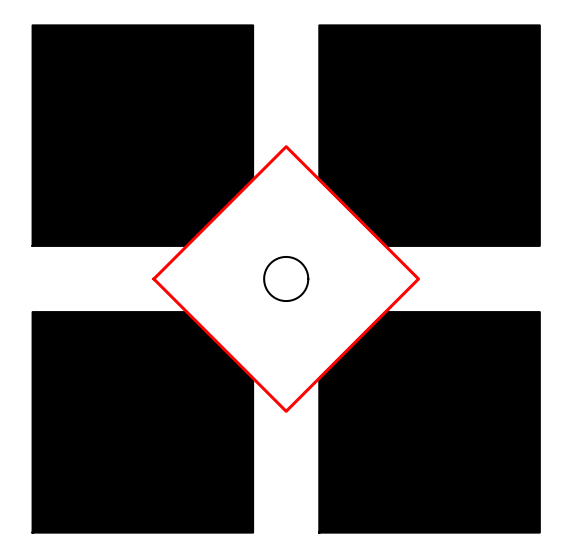

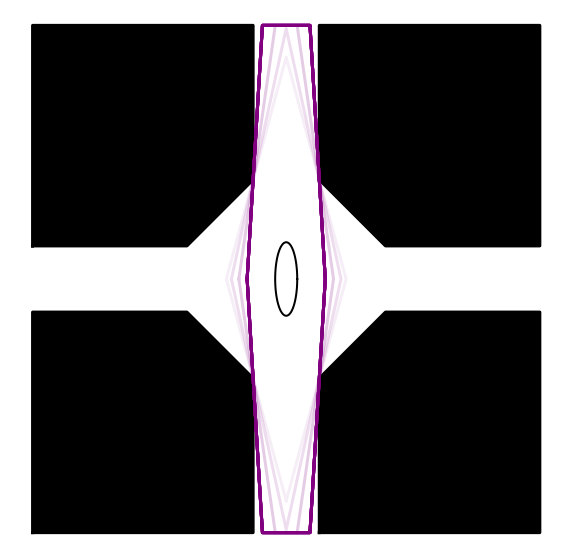

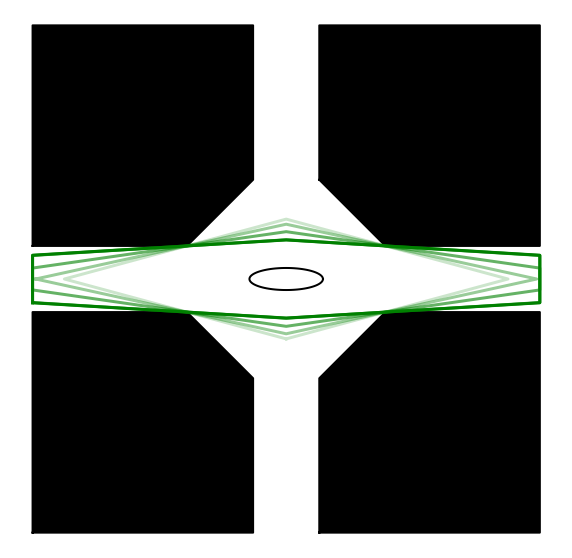

In [15]:
import matplotlib as mp
# mp.rcParams['axes.linewidth'] = .5
# mp.rcParams['lines.linewidth'] = .5
# mp.rcParams['patch.linewidth'] = .5
plt.rc('path',simplify=False)
fig, ax = plt.subplots(figsize = (10,10))
size = 2.3
xlim = size *np.array([-1,1])
ylim = size *np.array([-1,1])

domain = HPolyhedron.MakeBox(-size*np.ones(2), size*np.ones(2))

obstacles = []
dirs = [np.array([1, 1]),
        np.array([-1,1]), 
        np.array([-1,-1]),
        np.array([1,-1])]

box_size = 1
box = HPolyhedron.MakeBox(-box_size*np.ones(2), box_size*np.ones(2))

for dir in dirs:
    face_A = dir
    face_b = box_size*0.7*face_A@dir
    A_tot = np.concatenate((box.A(), face_A.reshape(1,2)))
    b_tot = np.concatenate((box.b(), np.array([face_b])))
    offset_tot = 1.3*box_size*A_tot@-dir
    b_tot += offset_tot
    obstacles.append(HPolyhedron(A_tot, b_tot))

# reg = HPolyhedron(np.concatenate((box.A(), face_A.reshape(1,2))),np.concatenate((box.b(), np.array([face_b]))))
# regions.append(reg)
regions = []
init_ells = []
iterations = 1

init_ell = Hyperellipsoid.MakeHypersphere(2e-1, np.zeros(2))
init_ells.append(init_ell)
for _ in range(iterations):
    iris_options.starting_ellipse = init_ell
    reg = Iris(obstacles, np.zeros(2), domain, iris_options)
    regions.append(reg)
    init_ell = reg.MaximumVolumeInscribedEllipsoid()
    init_ells.append(init_ell)

for r in regions:
  
    v = sorted_vertices(VPolytope(r)).T#s
    v = np.concatenate((v, v[0,:].reshape(1,-1)), axis=0)
    
    p = ax.plot(v[:,0], v[:,1], linewidth = 3, alpha = 1, c = 'r',zorder = 3)
    #ax.fill(v[:,0], v[:,1], alpha = 0.5, c = p[0].get_color())

plot_ellipse(ax, init_ells[0],  100, color= 'k', linewidth=2)


for o in obstacles:
  
    v = sorted_vertices(VPolytope(o)).T#s
    v = np.concatenate((v, v[0,:].reshape(1,-1)), axis=0)
    
    ax.plot(v[:,0], v[:,1], linewidth = 2, alpha = 1, color = 'k')
    ax.fill(v[:,0], v[:,1], alpha = 1, c = 'k')

ax.set_xlim(xlim)
ax.set_ylim(ylim)
ax.axis('equal')
ax.axis("off")
plt.savefig('center.png', dpi = 300)

################################################################################
fig, ax = plt.subplots(figsize = (10,10))
regions = []
init_ells = []
iterations = 15

colors = generate_lighter_reds(6)

init_ell = Hyperellipsoid(np.array([[10, 0],[0,3]]), np.zeros(2))
init_ells.append(init_ell)
for _ in range(iterations):
    iris_options.starting_ellipse = init_ell
    reg = Iris(obstacles, np.zeros(2), domain, iris_options)
    regions.append(reg)
    init_ell = reg.MaximumVolumeInscribedEllipsoid()
    init_ells.append(init_ell)

for i, r in enumerate(regions):
  
    v = sorted_vertices(VPolytope(r)).T#s
    v = np.concatenate((v, v[0,:].reshape(1,-1)), axis=0)
    
    p = ax.plot(v[:,0], v[:,1], linewidth = 3, alpha = (i*1 + 1)/iterations, color = 'purple',zorder = 3)
    ax.fill(v[:,0], v[:,1], alpha = 0.0, c = p[0].get_color())

plot_ellipse(ax, init_ells[0],  100, color= 'k', linewidth=2)

# for e in init_ells:
#     plot_ellipse(ax, e,  100, color= p[0].get_color())

for o in obstacles:
  
    v = sorted_vertices(VPolytope(o)).T#s
    v = np.concatenate((v, v[0,:].reshape(1,-1)), axis=0)
    
    ax.plot(v[:,0], v[:,1], linewidth = 3, alpha = 1, color = 'k')
    ax.fill(v[:,0], v[:,1], alpha = 1, c = 'k')

ax.set_xlim(xlim)
ax.set_ylim(ylim)
ax.axis('equal')
ax.axis("off")
plt.savefig('vert.png', dpi = 300)
################################################################################
fig, ax = plt.subplots(figsize = (10,10))
regions = []
init_ells = []
iterations = 5


init_ell = Hyperellipsoid(np.array([[3, 0],[0,10]]), np.zeros(2))
init_ells.append(init_ell)
for _ in range(iterations):
    iris_options.starting_ellipse = init_ell
    reg = Iris(obstacles, np.zeros(2), domain, iris_options)
    regions.append(reg)
    init_ell = reg.MaximumVolumeInscribedEllipsoid()
    init_ells.append(init_ell)

for i, r in enumerate(regions):
  
    v = sorted_vertices(VPolytope(r)).T#s
    v = np.concatenate((v, v[0,:].reshape(1,-1)), axis=0)
    
    p = ax.plot(v[:,0], v[:,1], linewidth = 3, alpha = (i*1 + 1)/iterations, color = 'g',zorder = 3)
    ax.fill(v[:,0], v[:,1], alpha = 0.0, c = p[0].get_color())

plot_ellipse(ax, init_ells[0],  100, color= 'k', linewidth=2)

# for e in init_ells:
#     plot_ellipse(ax, e,  100, color= p[0].get_color())


for o in obstacles:
  
    v = sorted_vertices(VPolytope(o)).T#s
    v = np.concatenate((v, v[0,:].reshape(1,-1)), axis=0)
    
    ax.plot(v[:,0], v[:,1], linewidth = 2, alpha = 1, color = 'k')
    ax.fill(v[:,0], v[:,1], alpha = 1, c = 'k')

ax.set_xlim(xlim)
ax.set_ylim(ylim)
ax.axis('equal')
ax.axis("off")
plt.savefig('side.png', dpi = 300)

Clique in collision:  False
Clique completely outside region:  False


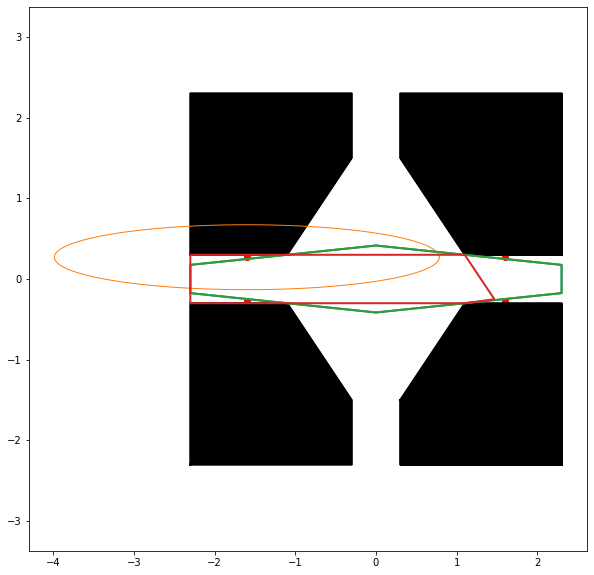

In [149]:
fig, ax = plt.subplots(figsize = (10,10))
size = 2.3
xlim = size *np.array([-1,1])
ylim = size *np.array([-1,1])

domain = HPolyhedron.MakeBox(-size*np.ones(2), size*np.ones(2))

obstacles = []
dirs = [np.array([1.5, 1]),
        np.array([-1.5,1]), 
        np.array([-1.5,-1]),
        np.array([1.5,-1])]

shift = [np.array([1, 1]),
        np.array([-1,1]), 
        np.array([-1,-1]),
        np.array([1,-1])]

box_size = 1
box = HPolyhedron.MakeBox(-box_size*np.ones(2), box_size*np.ones(2))

for dir,s in zip(dirs, shift):
    face_A = dir
    face_b = box_size*0.4*face_A@dir
    A_tot = np.concatenate((box.A(), face_A.reshape(1,2)))
    b_tot = np.concatenate((box.b(), np.array([face_b])))
    offset_tot = 1.3*box_size*A_tot@-s

    b_tot += offset_tot
    obstacles.append(HPolyhedron(A_tot, b_tot))

regions = []
init_ells = []
# init_ell = Hyperellipsoid(np.array([[10, 0],[0,10]]), np.zeros(2))
# init_ells.append(init_ell)
# iris_options.starting_ellipse = init_ell
# reg = Iris(obstacles, np.zeros(2), domain, iris_options)
#regions.append(reg)
init_ell = Hyperellipsoid(np.array([[10, 0],[0,1]]), np.zeros(2))
init_ells.append(init_ell)
iris_options.starting_ellipse = init_ell
reg = Iris(obstacles, np.zeros(2), domain, iris_options)
#regions.append(reg)

    



for o in obstacles:
  
    v = sorted_vertices(VPolytope(o)).T#s
    v = np.concatenate((v, v[0,:].reshape(1,-1)), axis=0)
    
    ax.plot(v[:,0], v[:,1], linewidth = 2, alpha = 1, color = 'k')
    ax.fill(v[:,0], v[:,1], alpha = 1, c = 'k')

spacing = 0.27
x_pos = 1.6
samples = np.array([[-x_pos,spacing],
           [-x_pos,-spacing],
           [x_pos,spacing],
           [x_pos,-spacing]])

el = get_lj_ellipse(samples)
iris_options.starting_ellipse = el
iris_options.iteration_limit = 5
reg = Iris(obstacles, np.zeros(2), domain, iris_options)
regions.append(reg)
for i, r in enumerate(regions):
  
    v = sorted_vertices(VPolytope(r)).T#s
    v = np.concatenate((v, v[0,:].reshape(1,-1)), axis=0)
    
    p = ax.plot(v[:,0], v[:,1], linewidth = 2, alpha = 1,zorder = 3)
    ax.fill(v[:,0], v[:,1], alpha = 0.0, c = p[0].get_color())

#plot_ellipse(ax, el, 100)

el = get_lj_ellipse(samples)
el = Hyperellipsoid(el.A(), samples[0,:])
iris_options.starting_ellipse = el
iris_options.iteration_limit = 10
reg = Iris(obstacles, samples[0,:], domain, iris_options)
regions.append(reg)
plot_ellipse(ax, el, 100)
for i, r in enumerate(regions):
  
    v = sorted_vertices(VPolytope(r)).T#s
    v = np.concatenate((v, v[0,:].reshape(1,-1)), axis=0)
    
    p = ax.plot(v[:,0], v[:,1], linewidth = 2, alpha = 1,zorder = 3)
    ax.fill(v[:,0], v[:,1], alpha = 0.0, c = p[0].get_color())

ax.scatter(samples[:,0], samples[:,1], c = 'r')
ax.set_xlim(xlim)
ax.set_ylim(ylim)
ax.axis('equal')
# ax.axis("off")

samples_in_collision = False
for s in samples:
    for o in obstacles:
        if o.PointInSet(s):
            samples_in_collision = True
            break
s_in_region = False
for s in samples:
    if reg.PointInSet(s):
        s_in_region |= True

print("Clique in collision: ", samples_in_collision)
print("Clique completely outside region: ", not s_in_region)
